## Лабораторная работа 6.
## Алгоритмы поиска и вставки элементов при последовательном хранении
 
1 - Создайте изменяемый класс-контейнер для последовательного хранения данных произвольного типа. Он должен представлять собой класс, представляющий собой "обертку" над списком list. В открытой части класса должны по крайней мере присутствовать:
конструктор __init__, позволяющий создавать экземпляр контейнера на основе входного списка элементов;
методы для представления хранимых данных строкой __repr__ и __str__;
метод __len__, возвращающий число хранимых элементов;

методы для доступа к элементам контейнера на чтение (__getitem__), доступ для записи по индексу нужно закрыть;

метод для итерирования по элементам контейнера, возвращающий объект-итератор (__iter__);

метод для проверки наличия конкретного элемента в контейнере (__contains__);
метод для вставки нового элемента в контейнер insert;

метод удаления элемента по индексу __delitem__.

In [11]:
class Contener:
    def __init__(self, data):
        self._data = data
        print("работает", self)

    def __repr__(self):
        return f"{self._data}"
    
    def __str__(self):
        return str(self._data)
    
    def __len__(self):
        return len(self._data)
    
    def __getitem__(self,index):
        return self._data[index]
        

    def __iter__(self):
        return iter(self._data)
    
    def __contains__(self, item):
        print("contains")
        return item in self._data
    
    
    def insert(self,index,value):
        self._data.insert(index,value)
        print(self._data)

    def find(self, item):
        try:
            return self._data.index(item)
        except ValueError:
            return print('не найден')  # Or raise an exception, depending on your requirements

    def __delitem__(self, index):
        del self._data[index]
        print(self._data)

if __name__ == "__main__":
    pn = Contener([4,6,8,9,5])  

    obj1 = Contener("asdasda")
    print(len(pn))
    print(pn[2])
    print(pn.__contains__(3))
    print(pn.insert(0,4))
    print(pn.find(8))
    del pn[2]
# print(pn)

работает [4, 6, 8, 9, 5]
работает asdasda
5
8
contains
False
[4, 4, 6, 8, 9, 5]
None
3
[4, 4, 8, 9, 5]


 ### При реализации методов insert, find, __contains__, __delitem__ следует учесть, что они (в среднем) должны работать со следующей асимптотической сложностью по времени:

insert - T(n)=O(n)

find и __contains__ - T(n)=O(logn)

__delitem__ - T(n)=O(n)
 
 Предложите и реализуйте модификацию реализованного вами шаблонного класса, которая будет обеспечивать среднюю временную сложность удаления элемента __delitem__ T(n)=O(logn)
 (остальные методы должны остаться аналогичными по сложности).

## Метод для вставки нового элемента в контейнер insert; Со следующей асимптотической сложностью по времени: insert - T(n)=O(n)

10000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
20000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
30000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
40000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
50000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
60000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
70000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
80000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
90000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
100000
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


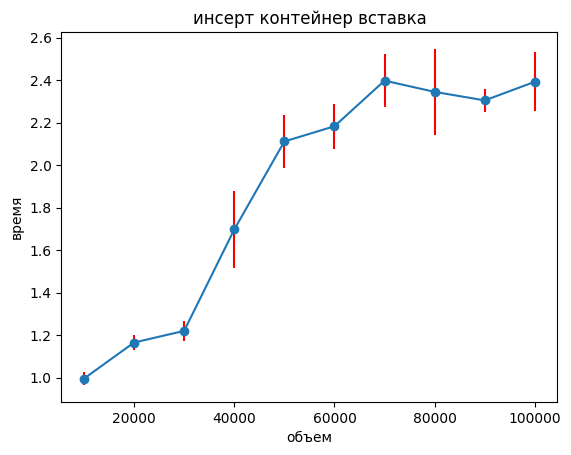

In [12]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

class Container:
    def __init__(self, data):
        self.data = data

    def insert(self, index, element):
        # Вставка элемента в произвольное место контейнера
        self.data.insert(index, element)

sizes = list(range(10000, 110000, 10000))
# Генерация списка рандомных чисел с шагом 1000 до 10000


# sizes = [random.randrange(0, 10000, 1000) for _ in range(1000)]

def time_insert(n):
    container = Container([])
    for _ in range(n):
        container.insert(n // 2, None)
    return timeit.timeit(lambda: container.insert(n // 2, None), number=100000)

if __name__ == "__main__":
    times = []
    time_stddevs = []
    for n in sizes:
        # Запуск timeit несколько раз для каждого размера контейнера
        results = [time_insert(n) for _ in range(5)]  # Запуск 5 раз для каждого размера
        times.append(np.mean(results))  # Среднее время
        time_stddevs.append(np.std(results))  # Стандартное отклонение
        print(n)
        print(sizes)

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-', ecolor='r', label='Contains')
    plt.xlabel('объем')
    plt.ylabel('время')
    plt.title('инсерт контейнер вставка')
    plt.show()

Size: 10000, Time: 3.239999932702631e-06
Size: 20000, Time: 7.64000287745148e-06
Size: 30000, Time: 1.4380000357050448e-05
Size: 40000, Time: 1.4180000289343297e-05
Size: 50000, Time: 1.8960001762025057e-05
Size: 60000, Time: 2.669999812496826e-05
Size: 70000, Time: 2.268000098410994e-05
Size: 80000, Time: 2.7659999614115804e-05
Size: 90000, Time: 2.702000201679766e-05
Size: 100000, Time: 3.105999930994585e-05


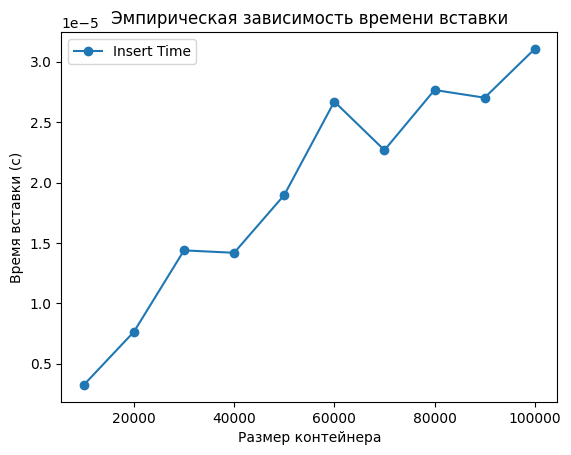

In [24]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

from triang import Triangle

# Ваш класс Triangle должен быть определен здесь

class Container:
    def __init__(self, data):
        self.data = data

    def insert(self, index, element):
        # Вставка элемента в произвольное место контейнера
        self.data.insert(index, element)

# Генерация списка треугольников
def generate_triangles(n):
    return [Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180)) for _ in range(n)]

sizes = list(range(10000, 110000, 10000))

def time_insert(n):
    triangles = generate_triangles(n)
    container = Container(triangles)
    # Вставка в середину списка
    index = len(triangles) // 2
    new_triangle = Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180))
    start_time = timeit.default_timer()
    container.insert(index, new_triangle)
    end_time = timeit.default_timer()
    return end_time - start_time

if __name__ == "__main__":
    times = []
    for n in sizes:
        # Запуск timeit несколько раз для каждого размера контейнера
        results = [time_insert(n) for _ in range(5)]  # Запуск 5 раз для каждого размера
        times.append(np.mean(results))  # Среднее время
        print(f"Size: {n}, Time: {times[-1]}")

    # Преобразование списков в массивы numpy для использования в plt.plot
    sizes_array = np.array(sizes)
    times_array = np.array(times)

    # Создание графика
    plt.plot(sizes_array, times_array, 'o-', label='Insert Time')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время вставки (с)')
    plt.title('Эмпирическая зависимость времени вставки')
    plt.legend()
    plt.show()

ValueError: 'x' and 'y' must have the same size

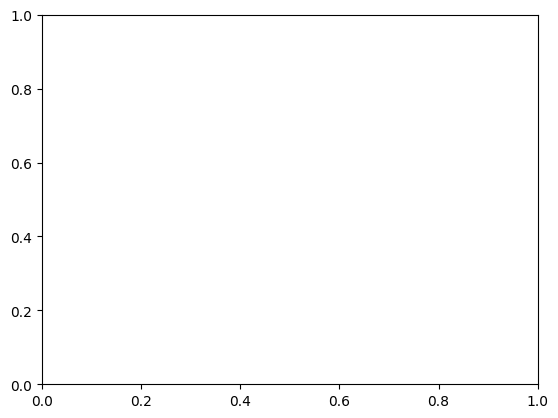

In [1]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

class Container:
    def __init__(self, data):
        self.data = data

    def insert(self, index, element):
        # Вставка элемента в произвольное место контейнера
        self.data.insert(index, element)

def time_insert(container_data, index):
    container = Container(container_data)
    return timeit.timeit(lambda: container.insert(index, None), number=10)

if __name__ == "__main__":
    # Генерация списка рандомных чисел с шагом 1000 до 10000
    container_data = random.sample(range(0, 10000, 1000), 10)

    times = []
    time_stddevs = []
    for _ in range(5):  # Запуск 5 раз для каждого размера
        results = []
        for index in range(len(container_data)):
            # Вставка элемента в произвольное место контейнера
            results.append(time_insert(container_data, index))
        times.append(np.mean(results))  # Среднее время
        time_stddevs.append(np.std(results))  # Стандартное отклонение

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(range(len(container_data)))
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-', ecolor='r', label='Container Insert')
    plt.xlabel('Index')
    plt.ylabel('Time')
    plt.title('Container Insert Performance')
    plt.legend()
    plt.show()

## Метод удаления элемента по индексу .Со следующей асимптотической сложностью по времени: __delitem__ - T(n)=O(n)

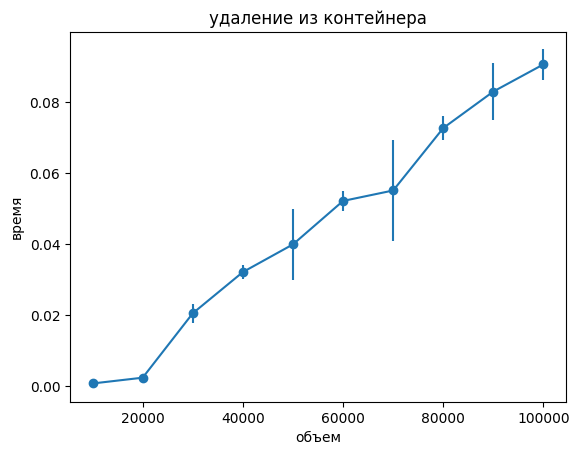

In [62]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

class Container:
    def __init__(self, data):
        self.data = data

    def __delitem__(self, index):
        # Удаление элемента из контейнера по индексу
        del self.data[index]

def time_delitem(container, index):
    # Измерение времени удаления элемента из контейнера
    # Используем лямбда-функцию, которая вызывает __delitem__ напрямую
    return timeit.timeit(lambda: container.__delitem__(index), number=100000)

if __name__ == "__main__":
    sizes = list(range(10000, 110000, 10000))
    times = []
    time_stddevs = []

    for n in sizes:
        # Создание контейнера с n элементами
        container = Container(list(range(n)))
        # Вычисление среднего времени удаления элемента и стандартного отклонения
        results = [time_delitem(container, n // 2) for _ in range(5)]
        times.append(np.mean(results))
        time_stddevs.append(np.std(results))

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-')
    plt.xlabel('объем')
    plt.ylabel('время')
    plt.title('удаление из контейнера')
    plt.show()

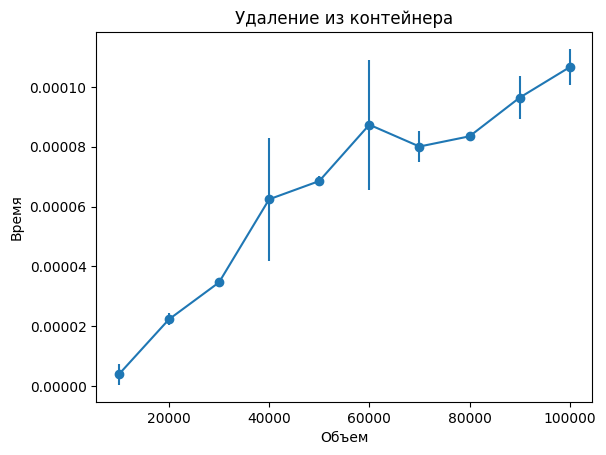

In [20]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random
import math

class Triangle:
    def __init__(self, a, b, c, alpha, beta, gamma):
        self.a = a
        self.b = b
        self.c = c
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    # Методы для вычисления площади, периметра, высот и определения вида треугольника
    # ... (остальная часть определения класса Triangle)

    def __repr__(self):
        return f"Triangle({self.a}, {self.b}, {self.c}, {self.alpha}, {self.beta}, {self.gamma})"

class Container:
    def __init__(self, data):
        self.data = data

    def __delitem__(self, index):
        # Удаление элемента из контейнера по индексу
        del self.data[index]

def generate_triangles(n):
    return [Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180)) for _ in range(n)]

def time_delitem(container, index):
    # Измерение времени удаления элемента из контейнера
    start_time = timeit.default_timer()
    del container[index]
    end_time = timeit.default_timer()
    return end_time - start_time

if __name__ == "__main__":
    sizes = list(range(10000, 110000, 10000))
    times = []
    time_stddevs = []

    for n in sizes:
        # Создание контейнера с n треугольниками
        triangles = generate_triangles(n)
        container = Container(triangles)
        # Вычисление среднего времени удаления элемента и стандартного отклонения
        results = [time_delitem(container, n // 2) for _ in range(5)]
        times.append(np.mean(results))
        time_stddevs.append(np.std(results))

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-')
    plt.xlabel('Объем')
    plt.ylabel('Время')
    plt.title('Удаление из контейнера')
    plt.show()

In [ ]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

from triang import Triangle

# Ваш класс Triangle должен быть определен здесь

class Container:
    def __init__(self, data):
        self.data = data

    def insert(self, index, element):
        # Вставка элемента в произвольное место контейнера
        self.data.insert(index, element)

# Генерация списка треугольников
def generate_triangles(n):
    return [Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180)) for _ in range(n)]

sizes = list(range(10000, 110000, 10000))

def time_insert(n):
    triangles = generate_triangles(n)
    container = Container(triangles)
    # Вставка в середину списка
    index = len(triangles) // 2
    new_triangle = Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180))
    start_time = timeit.default_timer()
    container.insert(index, new_triangle)
    end_time = timeit.default_timer()
    return end_time - start_time

if __name__ == "__main__":
    times = []
    for n in sizes:
        # Запуск timeit несколько раз для каждого размера контейнера
        results = [time_insert(n) for _ in range(5)]  # Запуск 5 раз для каждого размера
        times.append(np.mean(results))  # Среднее время
        print(f"Size: {n}, Time: {times[-1]}")

    # Преобразование списков в массивы numpy для использования в plt.plot
    sizes_array = np.array(sizes)
    times_array = np.array(times)

    # Создание графика
    plt.plot(sizes_array, times_array, 'o-', label='Insert Time')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время вставки (с)')
    plt.title('Эмпирическая зависимость времени вставки')
    plt.legend()
    plt.show()

In [26]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

from triang import Triangle  # Предполагается, что класс Triangle уже определен здесь

# Генерация списка треугольников
def generate_triangles(n):
    return [Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180)) for _ in range(n)]

sizes = list(range(10000, 110000, 10000))

def time_delete(n):
    triangles = generate_triangles(n)
    container = Container(triangles)
    # Удаление из середины списка
    index = len(triangles) // 2
    start_time = timeit.default_timer()
    del container[index]
    end_time = timeit.default_timer()
    return end_time - start_time

if __name__ == "__main__":
    times = []
    for n in sizes:
        # Запуск timeit несколько раз для каждого размера контейнера
        results = [time_delete(n) for _ in range(5)]  # Запуск 5 раз для каждого размера
        times.append(np.mean(results))  # Среднее время
        print(f"Size: {n}, Time: {times[-1]}")

    # Преобразование списков в массивы numpy для использования в plt.plot
    sizes_array = np.array(sizes)
    times_array = np.array(times)

    # Создание графика
    plt.plot(sizes_array, times_array, 'o-', label='Delete Time')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время удаления (с)')
    plt.title('Эмпирическая зависимость времени удаления')
    plt.legend()
    plt.show()

TypeError: 'Container' object doesn't support item deletion

Size: 10000, Time: 1.5419999544974417e-05
Size: 20000, Time: 2.8160000510979444e-05
Size: 30000, Time: 3.6899998667649926e-05
Size: 40000, Time: 4.962000093655661e-05
Size: 50000, Time: 5.776000034529716e-05
Size: 60000, Time: 7.446000090567395e-05
Size: 70000, Time: 8.487999875796958e-05
Size: 80000, Time: 9.35200005187653e-05
Size: 90000, Time: 0.0001052799983881414
Size: 100000, Time: 0.00011661999888019636


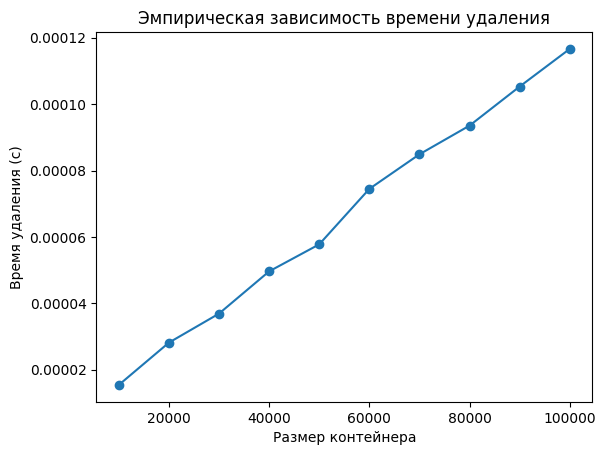

In [28]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

from triang import Triangle  # Предполагается, что класс Triangle уже определен здесь

# Генерация списка треугольников
def generate_triangles(n):
    return [Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180)) for _ in range(n)]

class Container:
    def __init__(self, data):
        self.data = data

    def __delitem__(self, index):
        # Удаление элемента из произвольного места контейнера
        del self.data[index]

def time_delete(n):
    triangles = generate_triangles(n)
    container = Container(triangles)
    # Удаление из середины списка
    index = len(triangles) // 2
    start_time = timeit.default_timer()
    del container[index]
    end_time = timeit.default_timer()
    return end_time - start_time

if __name__ == "__main__":
    sizes = list(range(10000, 110000, 10000))
    times = []
    for n in sizes:
        # Запуск timeit несколько раз для каждого размера контейнера
        results = [time_delete(n) for _ in range(5)]  # Запуск 5 раз для каждого размера
        times.append(np.mean(results))  # Среднее время
        print(f"Size: {n}, Time: {times[-1]}")

    # Преобразование списков в массивы numpy для использования в plt.plot
    sizes_array = np.array(sizes)
    times_array = np.array(times)

    # Создание графика
    plt.plot(sizes_array, times_array, 'o-', label='Delete Time')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время удаления (с)')
    plt.title('Эмпирическая зависимость времени удаления')

## Метод для поиска элемента по значению find. Cо следующей асимптотической сложностью по времени: find - T(n)=O(logn)

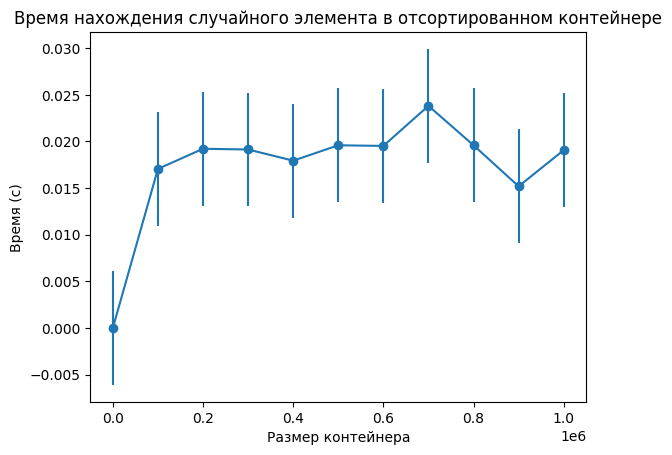

In [22]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

class Container:
    def __init__(self, size):
        self.data = sorted(random.sample(range(size * 2), size))

    def find(self, target):
        # Устанавливаем начальные границы поиска: левую и правую.
        left, right = 0, len(self.data) - 1

        # Цикл продолжается до тех пор, пока левая граница не станет больше правой.
        while left <= right:
            # Вычисляем индекс среднего элемента.
            mid = (left + right) // 2

            # Если средний элемент равен искомому, возвращаем его индекс.
            if self.data[mid] == target:
                return mid
            # Если средний элемент меньше искомого, сдвигаем левую границу.
            elif self.data[mid] < target:
                left = mid + 1
            # Если средний элемент больше искомого, сдвигаем правую границу.
            else:
                right = mid - 1

        # Если элемент не найден, возвращаем -1.
        return -1

def time_find(container, target):
    timer = timeit.Timer(lambda: container.find(target))
    return timer.timeit(number=10000)

if __name__ == "__main__":
    sizes = np.arange(0, 1100000, 100000)
    times = []

    for size in sizes:
        if size in sizes:
            if size > 0:
                container = Container(size)
                # Гарантируем, что цель присутствует в данных
                if len(container.data) > 0:
                    target = random.choice(container.data)
                    time = time_find(container, target)
                    times.append(time)
                else:
                    times.append(0)
            else:
                times.append(0)


    times = np.array(times)

    plt.errorbar(sizes, times, yerr=np.std(times, ddof=1), fmt='o-')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время (с)')
    plt.title('Время нахождения случайного элемента в отсортированном контейнере')
    plt.show()


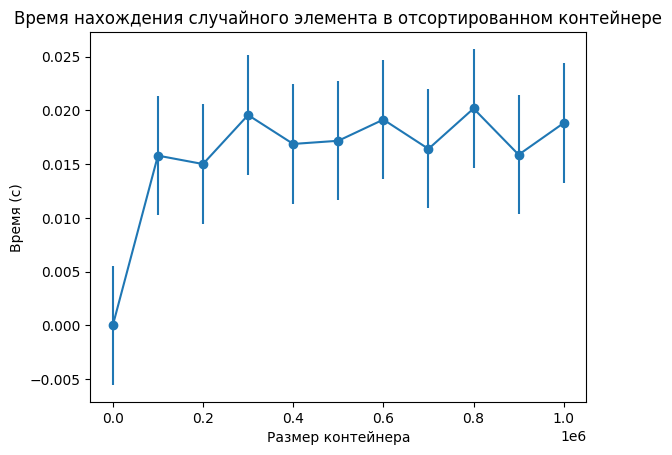

In [23]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

from triang import Triangle  # Предполагается, что класс Triangle уже определен здесь

# Генерация списка треугольников
def generate_triangles(n):
    return [Triangle(random.randint(1, 10), random.randint(1, 10), random.randint(1, 10), random.randint(1, 180), random.randint(1, 180), random.randint(1, 180)) for _ in range(n)]

class Container:
    def __init__(self, size):
        self.data = sorted(random.sample(range(size * 2), size))

    def find(self, target):
        left, right = 0, len(self.data) - 1
        while left <= right:
            mid = (left + right) // 2
            if self.data[mid] == target:
                return mid
            elif self.data[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return -1

def time_find(container, target):
    timer = timeit.Timer(lambda: container.find(target))
    return timer.timeit(number=10000)

if __name__ == "__main__":
    sizes = np.arange(0, 1100000, 100000)
    times = []

    for size in sizes:
        if size > 0:
            container = Container(size)
            # Гарантируем, что цель присутствует в данных
            if len(container.data) > 0:
                target = random.choice(container.data)
                time = time_find(container, target)
                times.append(time)
            else:
                times.append(0)
        else:
            times.append(0)

    times = np.array(times)

    plt.errorbar(sizes, times, yerr=np.std(times, ddof=1), fmt='o-')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время (с)')
    plt.title('Время нахождения случайного элемента в отсортированном контейнере')
    plt.show()

## Метод для проверки наличия конкретного элемента в контейнере (__contains__); Cо следующей асимптотической сложностью по времени: __contains__ - T(n)=O(logn)


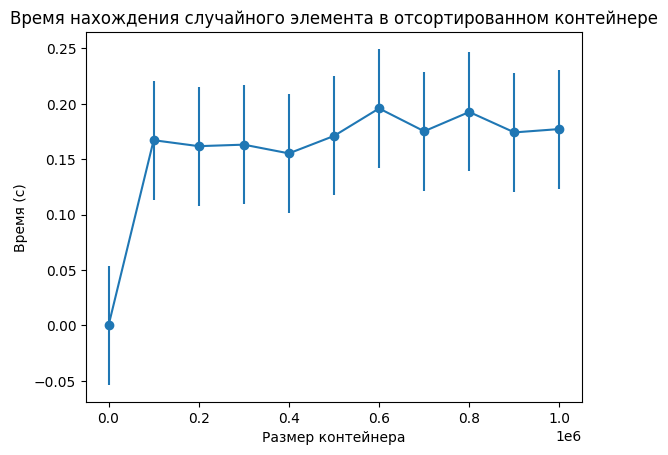

In [9]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

class Container:
    def __init__(self, size):
        self.data = sorted(random.sample(range(size), size))

    # def __contains__(self, target):
    #     left, right = 0, len(self.data) - 1
    #     while left <= right:
    #         mid = (left + right) // 2
    #         if self.data[mid] == target:
    #             return True
    #         elif self.data[mid] < target:
    #             left = mid + 1
    #         else:
    #             right = mid - 1
    #     return False
    
    def __contains__(self, target):
    # Инициализируем указатели для левой и правой границ поиска.
        left, right = 0, len(self.data) - 1

        # Цикл продолжается, пока левая граница не превысит правую.
        while left <= right:
            # Находим середину отрезка.
            mid = (left + right) // 2

            # Если элемент в середине равен искомому, возвращаем True.
            if self.data[mid] == target:
                return True
            # Если элемент в середине меньше искомого, сдвигаем левую границу.
            elif self.data[mid] < target:
                left = mid + 1
            # Если элемент больше, сдвигаем правую границу.
            else:
                right = mid - 1

        # Если элемент не найден, возвращаем False.
        return False


def time_contains(container, target):
    timer = timeit.Timer(lambda: target in container)
    return timer.timeit(number=100000)

if __name__ == "__main__":
    sizes = np.arange(0, 1100000, 100000)
    times = []

    for size in sizes:
        if size > 0:  # Проверяем, чтобы размер был больше 0
            container = Container(size)
            # Гарантируем, что цель присутствует в данных
            if len(container.data) > 0:  # Проверяем, что данные не пусты
                target = random.choice(container.data)
                time = time_contains(container, target)
                times.append(time)
            else:
                times.append(0)  # Если данные пусты, добавляем 0 для графика
        else:
            times.append(0)  # Если размер контейнера равен 0, добавляем 0 для графика

    times = np.array(times)

    plt.errorbar(sizes, times, yerr=np.std(times, ddof=1), fmt='o-')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время (с)')
    plt.title('Время нахождения случайного элемента в отсортированном контейнере')
    plt.show()

## 3 - Предложите и реализуйте модификацию реализованного вами шаблонного класса, которая будет обеспечивать среднюю временную сложность удаления элемента __delitem__ T(n)=O(logn) (остальные методы должны остаться аналогичными по сложности).

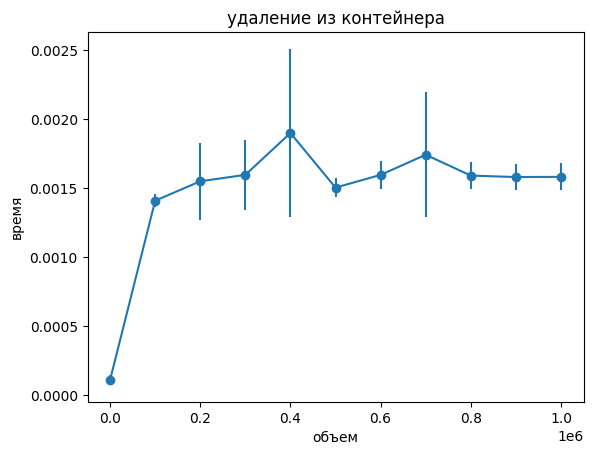

In [27]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

class Container:
    def __init__(self, data):
        self.data = sorted(data)

    def __delitem__(self, value):
        # Бинарный поиск индекса элемента
        index = self.binary_search(value)
        if index != -1:
            del self.data[index]

    def binary_search(self, value):
        low = 0
        high = len(self.data) - 1
        while low <= high:
            mid = (low + high) // 2
            if self.data[mid] == value:
                return mid
            elif self.data[mid] < value:
                low = mid + 1
            else:
                high = mid - 1
        return -1

def time_delitem(container, value):
    # Измерение времени удаления элемента из контейнера
    # Используем лямбда-функцию, которая вызывает __delitem__ напрямую
    return timeit.timeit(lambda: container.__delitem__(value), number=1000)

if __name__ == "__main__":
    sizes = list(range(0, 1100000, 100000))
    times = []
    time_stddevs = []

    for n in sizes:
        # Создание контейнера с n элементами
        container = Container(list(range(n)))
        # Вычисление среднего времени удаления элемента и стандартного отклонения
        results = [time_delitem(container, n // 2) for _ in range(100)]
        times.append(np.mean(results))
        time_stddevs.append(np.std(results))

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-')
    plt.xlabel('объем')
    plt.ylabel('время')
    plt.title('удаление из контейнера')
    plt.show()

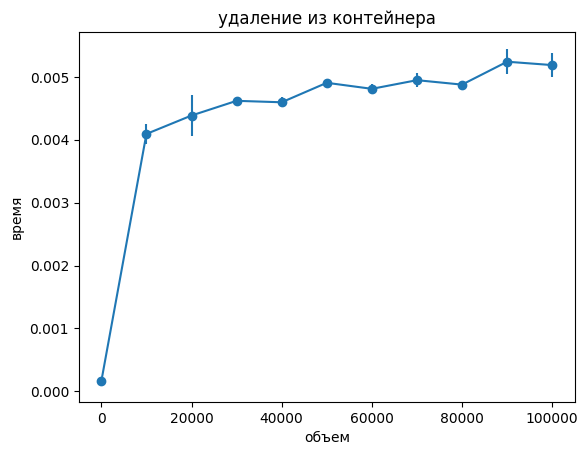

In [4]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    # Конструктор класса, инициализирующий корень дерева.
    def __init__(self):
        self.root = None

    # Метод для вставки ключа в АВЛ-дерево.
    def insert(self, key):
        # Если корень пуст, создаем новый узел.
        if not self.root:
            self.root = Node(key)
        # Иначе вызываем вспомогательный метод _insert.
        else:
            self.root = self._insert(self.root, key)

    # Вспомогательный метод для вставки ключа.
    def _insert(self, root, key):
        # Если текущий узел пуст, создаем новый узел.
        if not root:
            return Node(key)
        # Если ключ меньше, вставляем в левое поддерево.
        elif key < root.key:
            root.left = self._insert(root.left, key)
        # Если ключ больше, вставляем в правое поддерево.
        else:
            root.right = self._insert(root.right, key)

        # Обновляем высоту текущего узла.
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        # Вычисляем баланс для текущего узла.
        balance = self.getBalance(root)

        # Если дерево несбалансировано, выполняем соответствующие повороты.
        # Повороты выполняются в зависимости от расположения ключа.
        if balance > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balance < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        # Возвращаем корень сбалансированного поддерева.
        return root

    # Метод для удаления ключа из АВЛ-дерева.
    def delete(self, key):
        # Вызываем вспомогательный метод _delete.
        self.root = self._delete(self.root, key)

    # Вспомогательный метод для удаления ключа.
    def _delete(self, root, key):
        # Если текущий узел пуст, возвращаем его.
        if not root:
            return root
        # Если ключ меньше, удаляем из левого поддерева.
        elif key < root.key:
            root.left = self._delete(root.left, key)
        # Если ключ больше, удаляем из правого поддерева.
        elif key > root.key:
            root.right = self._delete(root.right, key)
        # Если ключ равен ключу текущего узла, удаляем этот узел.
        else:
            # Узел с одним потомком или без потомков.
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp

            # Узел с двумя потомками: получаем преемника (самый маленький в правом поддереве).
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self._delete(root.right, temp.key)

        # Если после удаления дерево стало пустым, возвращаем None.
        if root is None:
            return root

        # Обновляем высоту текущего узла.
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        # Вычисляем баланс для текущего узла.
        balance = self.getBalance(root)

        # Если дерево несбалансировано, выполняем соответствующие повороты.
        if balance > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balance < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        # Возвращаем корень сбалансированного поддерева.
        return root

    # Метод для левого поворота.
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    # Метод для правого поворота.
    def rightRotate(self, y):
        x = y.left
        T3 = x.right
        x.right = y
        y.left = T3
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        return x

    # Метод для получения высоты узла.
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Метод для вычисления баланса узла.
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    # Метод для получения узла с минимальным ключом.
    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    # Метод для вывода ключей дерева в префиксном порядке.
    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

class Container:
    def __init__(self, data):
        self.avl_tree = AVLTree()
        for key in data:
            self.avl_tree.insert(key)

    def __delitem__(self, key):
        self.avl_tree.delete(key)

def time_delitem(container, key):
    # Измерение времени удаления элемента из контейнера
    # Используем лямбда-функцию, которая вызывает __delitem__ напрямую
    return timeit.timeit(lambda: container.__delitem__(key), number=10000)

if __name__ == "__main__":
    sizes = list(range(0, 110000, 10000))
    times = []
    time_stddevs = []

    for n in sizes:
        # Создание контейнера с n элементами
        container = Container(list(range(n)))
        # Вычисление среднего времени удаления элемента и стандартного отклонения
        results = [time_delitem(container, n // 2) for _ in range(100)]
        times.append(np.mean(results))
        time_stddevs.append(np.std(results))

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-')
    plt.xlabel('объем')
    plt.ylabel('время')
    plt.title('удаление из контейнера')
    plt.show()